**Hossein ATRSAEI**

# Homework 4: Support Vector Machines (SVM)

## Practical assignment objective:

This assignment is aimed at coding a perceptron from scratch in order to learn how this simple but powerful linear binary classifier works.

In the following sections you can find a brief summary on what a perceptron is and how it works, and finally the text of the assignment.

(The text and the pictures of this section were taken from Haykin, O., "Neural Networks and Learning Machines", Pearson, 2009)

This exercise can be done in pairs. You must first copy this notebook to your own google drive, mount it and complete the code as requested. Some of the questions require you to write on a comment cell.

After completing the notebook you must download it and manually send it before the deadline by email to the email: si221.micas911@gmail.com

Copy this notebook and insert the corresponding names on the file.

**If you have any questions feel free to send an email to the TA's:**

### breno.skuk@gmail.com

### julien.beguinot@telecom-paris.fr


# About about the perceptron algorithm

## Historical introduction

The perceptron occupies a special place in the historical development of neural networks:
It was the first algorithmically described neural network. Its invention by Rosenblatt, a psychologist, inspired engineers, physicists, and mathematicians alike to devote their research effort to different aspects of neural networks in the 1960s and the 1970s.

The perceptron is the simplest form of a neural network used for the classification of data said to be linearly separable (i.e., data that lie on opposite sides of a hyperplane). Basically, it consists of a single neuron with adjustable synaptic weights and bias.

The algorithm used to adjust the free parameters of this neural network first appeared in a learning procedure developed by Rosenblatt for his perceptron brain model. Indeed, Rosenblatt proved that if the data
used to train the perceptron are drawn from two linearly separable classes, then the perceptron algorithm finds hyperplane that separates the two classes.

 A perceptron is limited to performing pattern classification with only two classes. By expanding the output (computation) layer of the perceptron to include more than one neuron, we may perform classification with more than two classes. This is left as an bonus exercise on this TP!


## Working with a perceptron

A perceptron consists of a linear combiner followed by a hard limiter (e.g. the sign
function, the Heaviside step function or a simple function like these) (see Figure 1).



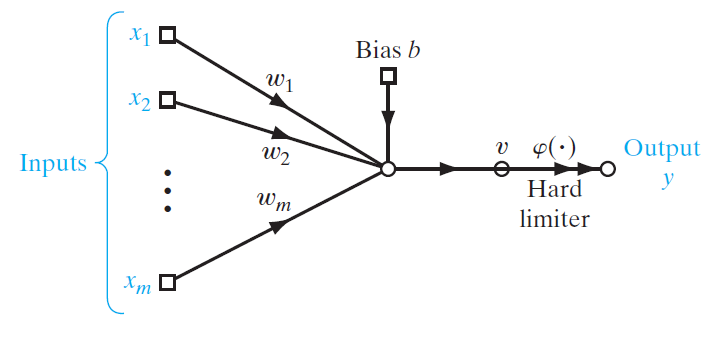

The summing node of the neural model computes a linear combination of the inputs applied to its synapses, as well as incorporates an externally applied bias. The resulting sum is applied to a hard limiter. Accordingly, for example if the hard limiter is the Heaviside step function, the neuron produces an output equal to 1 if the hard limiter input is positive, and 0 if it is negative. The synaptic weights of the perceptron are denoted by $w_1$, $w_2$, ...,$w_m$. Correspondingly, the inputs applied to the perceptron are denoted by $x_1$, $x_2$, ..., $x_m$. The externally applied bias is denoted by $b$. From the model, we find that the hard limiter input of the neuron is:

\begin{equation*}
v=\sum_{i=1}^{m} w_i x_i + b.
\end{equation*}

The goal of the perceptron is to correctly classify the set of externally applied stimuli $x_1$, $x_2$, ..., $x_m$ into one of two classes, $\mathcal{C}_1$ or $\mathcal{C}_2$. The decision rule for the classification is to assign the sample represented by the inputs $x_1$, $x_2$, ..., $x_m$ to class $\mathcal{C}_1$ if the perceptron output $y$ is 1 and to class $\mathcal{C}_2$ if it is 0. To develop insight into the behavior of a classifier, it is customary to plot
a map of the decision regions in the $m$-dimensional signal space spanned by the m input variables $x_1$, $x_2$, ..., $x_m$. In the simplest form of the perceptron, there are two decision regions separated by a hyperplane, which is defined by:
\begin{equation*}
\sum_{i=1}^{m} w_i x_i + b =0.
\end{equation*}

This is illustrated in Figure 2 for the case of two input variables $x_1$ and $x_2$, for which the
decision boundary takes the form of a straight line.

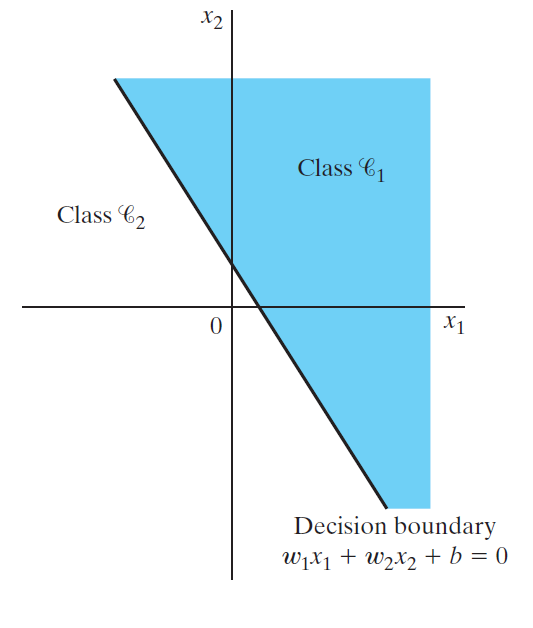

A sample $(x_1, x_2)$ that lies above the boundary line is assigned to class $\mathcal{C}_1$, and a sample $(x_1, x_2)$ that lies below the boundary line is assigned to class $\mathcal{C}_2$. Note also that the effect of the bias $b$ is merely to shift the decision boundary away from the origin. The synaptic weights $w_1$, $w_2$, ..., $w_m$ of the perceptron can be adapted on an iteration by iteration basis called \emph{error-correction rule}. To derive this rule, it is more convenient to work with the modified model in Figure 3. In this model, equivalent to the one of Figure 1, the bias $b$ is treated as a synaptic weight driven by a fixed input equal to +1. We may thus define the $(m + 1)$-by-1 input vector:
\begin{equation*}
\mathbf{x}(n) = \begin{bmatrix}
	1 & x_1(n) & x_2(n) & \cdots & x_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $n$ denotes the time-step in applying the algorithm, $x_0(n)=1$ and $\mathbf{x}(n)$ denotes the $n$th input vector of the data set $\{\mathbf{x}(1),\ldots,\mathbf{x}(N)\}$. Correspondingly, we define the $(m + 1)$-by-1 weight vector as:
\begin{equation*}
\mathbf{w}(n) = \begin{bmatrix}
	b(n) & w_1(n) & w_2(n) & \cdots & w_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $w_0(n)=b(n)$ and $\mathbf{w}(n)$ denotes the weight vector at the $n$th iteration of the algorithm.

Accordingly, the linear combiner output is written in the compact form as follows:

\begin{align*}
	v&=<\mathbf{w}(n),\mathbf{x}(n)>\sum\limits_{i=0}^m w_i(n)\,x_i(n)=\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n),\\
	y&=\varphi\left(\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n)\right).
\end{align*}

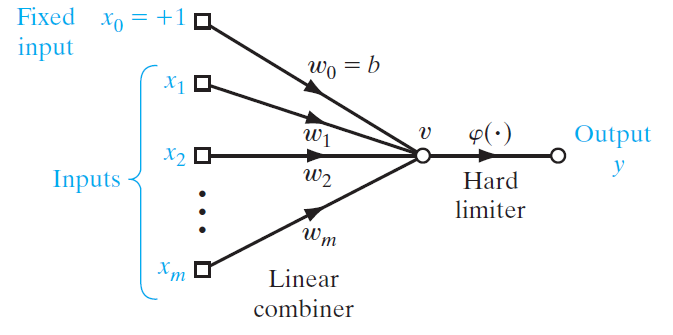

 Suppose then that the input variables of the perceptron originate from two linearly separable classes. Let $\mathcal{H}_1$ be the subspace of training vectors that belong to class $\mathcal{C}_1$, and let $\mathcal{H}_2$  be the subspace of training vectors that belong to class $\mathcal{C}_2$. The union of $\mathcal{H}_1$ and $\mathcal{H}_2$ is the complete space denoted by $\mathcal{H}$. Given the sets of vectors $\mathcal{H}_1$ and $\mathcal{H}_2$ to train the classifier, the training process involves the adjustment of the weight vector $\mathbf{w}$ in such a way that the two classes $\mathcal{C}_1$ and $\mathcal{C}_2$ are linearly separable. That is, there exists a weight vector $\mathbf{w}$ such that we may state:

$\mathbf{w}^{\mathrm{T}}\,\mathbf{x}>0$ for every input vector $\mathbf{x}$ belonging to class $\mathcal{C}_1$

$\mathbf{w}^{\mathrm{T}}\,\mathbf{x}\leq0$ for every input vector $\mathbf{x}$ belonging to class $\mathcal{C}_2$

We have arbitrarily chosen to say that the input vector $\mathbf{x}$ belongs to class $\mathcal{C}_2$ if $\mathbf{w}^{\mathrm{T}}\,\mathbf{x}=0$. Given the subsets of training vectors $\mathcal{H}_1$ and $\mathcal{H}_2$, the training problem for the perceptron is then to find a weight vector $\mathbf{w}$ such that the two inequalities above are satisfied. The algorithm for adapting the weight vector of the elementary perceptron may now be formulated as follows:




**1**:
If the $n$th member of the training set, $\mathbf{x}(n)$, is correctly classified by the weight vector $\mathbf{w}(n)$ computed at the $n$th iteration of the algorithm, no correction is made to the
weight vector of the perceptron according to the rule:



*   if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) >0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_1$:

$$\mathbf{w}(n + 1) = \mathbf{w}(n)$$
*   if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) \leq 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_2$:

$$\mathbf{w}(n + 1) = \mathbf{w}(n)$$

**2**:  Otherwise, the weight vector of the perceptron is updated according to
the rule:



* if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) > 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_2$:
 $$\mathbf{w}(n + 1) = \mathbf{w}(n) - \eta(n)\,\mathbf{x}(n)$$

* if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) \leq 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_1$:

 $$\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta(n)\,\mathbf{x}(n)$$

where the learning-rate parameter $\eta(n)$ controls the adjustment applied to the weight vector at iteration $n$. If $\eta(n)\!=\!\eta\!>\! 0$, where $\eta$ is a constant independent of the iteration number $n$, then we have a fixed-increment adaptation rule for the perceptron. The adaptation of the weight vector $\mathbf{w}(n)$ is nicely summarized in the form:
\begin{equation}
\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta \left(d(n) - y(n)\right)\mathbf{x}(n), \end{equation}
where $d(n)$ is the desired output for $\mathbf{x}(n)$.

# Exercise 1: Synthetic data

For the rest of the question complete the cells below as requested.

### Imports:

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plot data

In [8]:
# Plot data
def plot(X, Y, w=np.array([]), xlabel=None, ylabel=None, tick_labels=None):
    """
    Parameters:
    -----------
    X: input data [N x d]
    Y: labels [N x 1]
    W: perceptron weights [d x 1] or [d+1 x 1] (if bias was included)

    """
    # data
    plt.figure( figsize=(8,6) )

    sc = plt.scatter( X[:,0], X[:,1], c=Y )
    cb = plt.colorbar(sc)
    cb.set_ticks( np.sort( np.unique(Y) ) )
    if tick_labels != None:
        cb.set_ticklabels( tick_labels )

    if xlabel != None:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel != None:
        plt.ylabel(ylabel, fontsize=14)

    if w.size != 0:
        # separating hyperplane
        y1, y2 = plt.ylim()

        if w.shape[0] == 3:
          w1 = w[0]
          w2 = w[1]
          b  = w[2]

        else:
          w1 = w[0]
          w2 = w[1]
          b  = 0


        lb = min(X[:, 0])
        ub = max(X[:, 0])

        # Plotting the line using w1, w2, and b
        x_line = np.linspace(lb, ub, 400)  # Generate x values
        y_line = (-b - w1 * x_line) / w2  # Calculate corresponding y values

        plt.plot(x_line, y_line, c='black', linestyle='--')

        plt.ylim(y1, y2)

    # Add a grid
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

## Part 1

Consider a data set $\{\mathbf{x}(n),d(n)\}_{n=1}^{200}$ consisting of 200 points $\mathbf{x}(n)=(x_1(n),x_2(n))$ and their corresponding labels $d(n)$, such that the first 100 points have label $d(n)=1$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}(\left[1, 0\right],\sigma^2 \mathbf{I})$, and such that the other 100 points have label $d(n)=0$ and are generated according to a Gaussian distribution $\sim \mathcal{N}(\left[-1, 0\right],\sigma^2 \mathbf{I})$.


In order to visualize each generated data set and the corresponding solution given by the algorithm, plot all generated points in a coordinate plane and the estimated decision line, given by the estimated coefficients of the perceptron at the convergence.


## Attention:

A common mistake when generating data samples is using the wrong distribution parameters.

np.random.normal(loc=0.0, scale=1.0, size=None) uses the std deviation to generate samples, not variance.

To avoid mistakes like this always read the documentation of thelibraries you are importing.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [16]:
# Generate a random permutation of indices
def shuffle_data(X,Y):
    """
    Parameters:
    -----------
    X: R2 points [N x 2]
    Y: Labels [N x 1]

    Returns:
    --------
    permutated X: R2 points [N x 2]
    permutated Y: Labels [N x 1]

    """
    permutation = np.random.permutation(len(Y))
    return X[permutation], Y[permutation]

In [17]:
def generate_data(N, mean_1, mean_2, var, shuffle = True, seed = -1):
  """
  Parameters:
  -----------
  N: number of data points
  mean_1: mean of first normal distribution
  mean_2: mean of second normal distribution
  var: variance of both normal distributions
  shuffle: boolean to shuffle or not generated data
  seed: random seed of the data generator

  Returns:
  --------
  X: R2 points [N x 2]
  Y: Labels [N x 1]

  """
  # set random seed
  if seed >= 0:
    np.random.seed(seed)

  #  Create zero data
  X_zero = np.random.multivariate_normal(mean_1, var*np.identity(2), int(N/2))

  # Create ones data
  X_one = np.random.multivariate_normal(mean_2, var*np.identity(2), int(N/2))

  # Concatenate arrays along axis 0
  X = np.concatenate((X_zero, X_one), axis=0)

  # Create an array filled with ones and another filled with zeros
  ones_array = np.ones((int(N/2),1))
  zeros_array = np.zeros((int(N/2),1))

  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((ones_array, zeros_array), axis=0)

  if shuffle:
    # shuffle data
    X,Y = shuffle_data(X,Y)

  return X,Y

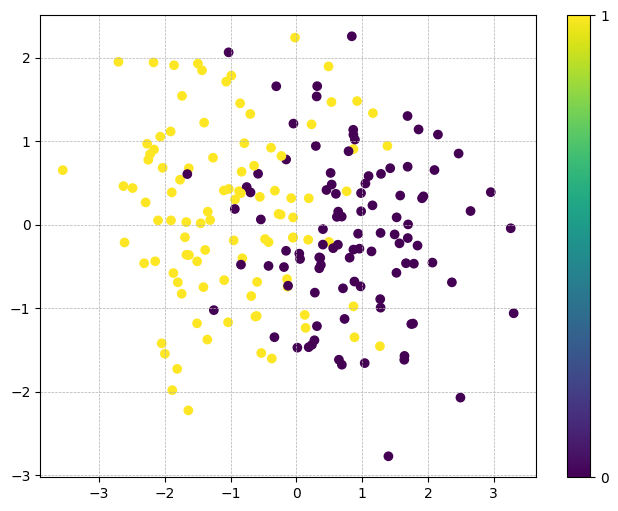

In [18]:
# Test data generation
X, Y = generate_data(N = 200, mean_1 = [-1,0], mean_2 = [1,0], var = 1, seed = 0)
plot(X, Y)

## Part 2
Complete the perceptron code function below.

In [19]:
# Perceptron algorithm
def perceptron( X, Y, lr, nb_epochs=100, eps=1e-4):
    """
    Parameters:
    -----------
    X: input data [N x d]
    Y: labels [N x 1]

    Returns:
    --------
    W: perceptron weights [d x 1]
    """
    # number of samples
    N = X.shape[0]
    # get dimension of input data
    d = X.shape[1]

    # initialize w
    w = np.zeros(d)

    # each epoch corresponds to a whole pass through the dataset
    for _ in range(nb_epochs):
      for i in range(N):
        if np.dot(X[i],w) >= 0: y = 1
        else: y = 0
        if Y[i] != y:
          w += lr * (Y[i] - y) * X[i]

    return w

## Bias:

What should we do if we wanted to implement bias in the perceptron without modifying the algorithm?



**Answer**:
We can just concatinate our data set with the ones' vector and produce the vector of our weights with respect to dimention of our data set's features. As mentioned, we can define X and w as shown below:
\begin{equation*}
\mathbf{x}(n) = \begin{bmatrix}
	1 & x_1(n) & x_2(n) & \cdots & x_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $n$ denotes the time-step in applying the algorithm, $x_0(n)=1$ and $\mathbf{x}(n)$ denotes the $n$th input vector of the data set $\{\mathbf{x}(1),\ldots,\mathbf{x}(N)\}$. Correspondingly, we define the $(m + 1)$-by-1 weight vector as:
\begin{equation*}
\mathbf{w}(n) = \begin{bmatrix}
	b(n) & w_1(n) & w_2(n) & \cdots & w_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $w_0(n)=b(n)$ and $\mathbf{w}(n)$ denotes the weight vector at the $n$th iteration of the algorithm.

## Prediction

Implement the prediction function

In [20]:
def predict(X, w):
  # include bias
  if w.shape[0] == 3:
    Y_pred = np.array(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ) @ w > 0, dtype = int)
  else:
    Y_pred = np.array(X @ w > 0, dtype = int)
  # Add one dimension along axis -1
  return Y_pred[:, np.newaxis]

## Evaluation metric:

Implement the accuracy metric:

In [21]:
def accuracy(Y, Y_pred):
    """
    Parameters:
    -----------
    Y: labels [N x 1]
    Y_pred: predicted labels [N x 1]

    Returns:
    --------
    acc: accuracy
    """
    acc = np.count_nonzero(abs(Y[:,0]-Y_pred[:,0]))

    return 1 - acc/np.shape(Y)[0]

## Train and test:
Train the perceptron on randomly generated data (in $\mathbb{R}^2$) of your choosing. Be mindful of using a train set and a test set.

## Shuffling

In the following experiment we train the perceptron with shuffled and unshuffled data.

What can you say about the importance of shuffling data when training the perceptron?



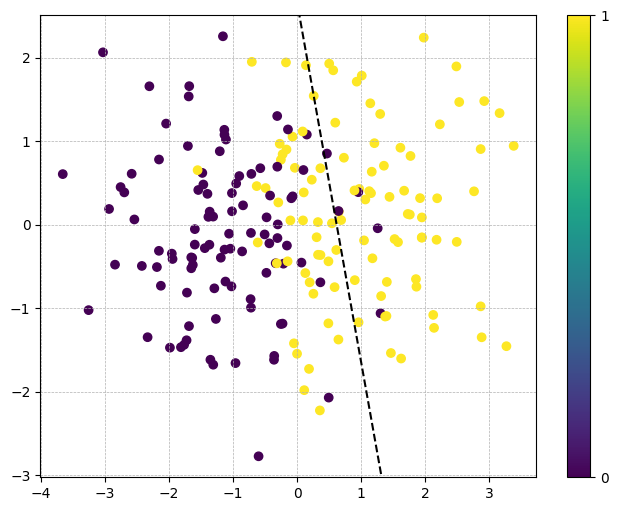

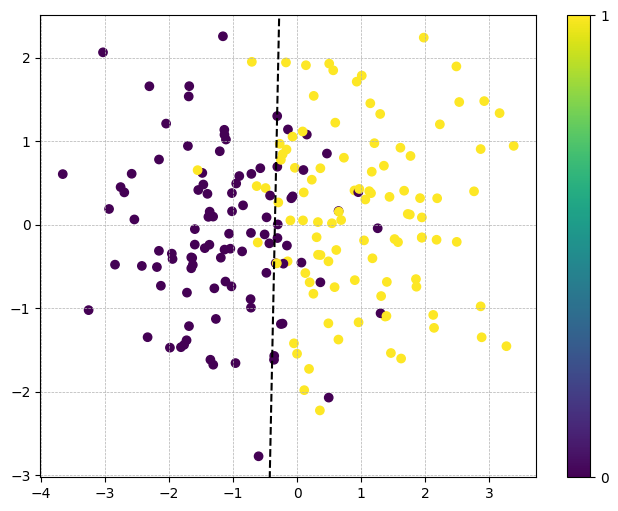

In [9]:
# Test data generation
X, Y = generate_data(N = 200, mean_1 = [1,0], mean_2 = [-1,0], var = 1, seed = 0)

include_bias = True
nb_epochs = 100
lr = 1

# include bias
if include_bias:
  w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
else:
  w = perceptron(X, Y, lr)

# plot unshuffled data
plot(X,Y,w)

X, Y = shuffle_data(X,Y)
# include bias
if include_bias:
  w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
else:
  w = perceptron(X, Y, lr)

# plot nshuffled data
plot(X,Y,w)

**Answer:**

Shuffling helps the model to generalize better to unseen data. By seeing a variety of examples in different orders, the model learns more robust patterns and is less likely to overfit to the training data.

## Evaluate train and test accuracy using the provided functions:

How could we get a good estimate of the true risk?

**Answer:**
We can choose a large data set which contribute to more generalization and better learning process. If our data set is not large enough, it will lead to lower accuracy on test data. In addition, according to the result of comparison between shuffled and unshuffled data set, we can claim that shuffling data plays a crucial role in getting the better accuracy.

In [10]:
X_test, Y_test = generate_data(N = 1000, mean_1 = [1,0], mean_2 = [-1,0], var = 1)
Y_test_pred = predict(X_test, w)
test_accuracy = accuracy(Y_test, Y_test_pred)
print(f'Test accuracy = {test_accuracy}')

Test accuracy = 0.837


Evaluate the computational complexity of the perceptron in terms of arithmetic operations per iteration.

**Answer**:

According to the below picture, we have d-1 additions and d multiplication for each sample. As, we have N samples per iterations we can say:
computational complexity = O(Nd)

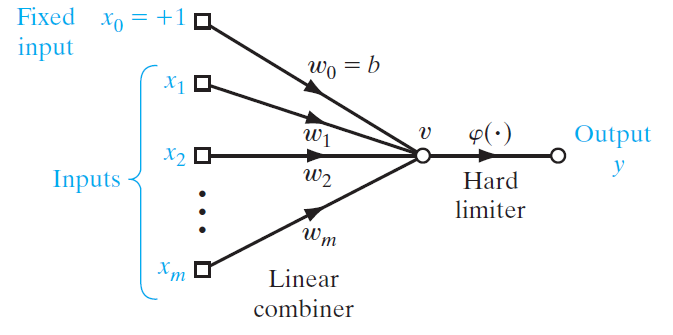

## Part 3:

Consider four different values $\{0.05, 0.25, 0.50, 0.75\}$ of the noise variance $\sigma^2$. For each of these values, run the perceptron over 50 randomly generated data sets, compute the average error $e(\sigma^2)$ and its standard deviation $s(\sigma^2)=\sqrt{\frac{1}{50}\sum_{i=1}^{50}(e_i-e)^2}$, where $e_i$ denotes the fraction of misclassified points.  Represent graphically $e(\sigma^2)$ and $s(\sigma^2)$ for the four values of $\sigma^2$ (use error bars). Comment.

In [40]:
# don't change the random seed
np.random.seed(0)

# list of variances
var_list = [0.05, 0.25, 0.50, 0.75, 1]

# dataset size
N = 200

# train parameters
lr = 1
include_bias = True

mean_error = []
std_error = []

for var in var_list:

    e = []

    for i in range(50):

        # generate data
        X, Y = generate_data(N = N, mean_1 = [1,0], mean_2 = [-1,0], var = var)

        # Train the perceptron. Include bias if necessary
        if include_bias:
          w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
        else:
          w = perceptron(X, Y, lr)

        # predict
        Y_pred = predict(X,w)

        # evaluate
        acc = accuracy(Y, Y_pred)
        e.append( 1-acc )

    mean_error.append( np.mean(e) )
    std_error.append( np.std(e) )

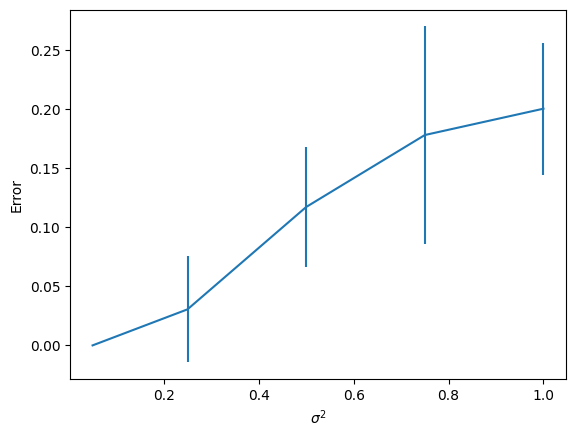

In [42]:
plt.figure()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("Error")
plt.errorbar(var_list, mean_error, yerr=std_error)
plt.show()

**Comment the results as best as you can. For instance, what is the influence of $N$ on the experiment?**
**Answer:**
As mentioned before, increasing N improve accuracy, since the algorithm can learn sufficiently to predict the test data more correctly. Therefore, increasing N, can decrease the error mean.
Moreover, the picure above shows us that increasing the variance of datasets leading to more error mean. This means that finding a hyperplane to separate points is getting harder and harder, because the data is sparse.

## Part 4:
Generate one data set with $\sigma^2=0.15$. A new random data set is now obtained by flipping each label $d(n)$ with probability $p$ to obtain $\tilde{d}(n)$. Considering the generated data set $\{\mathbf{x}(n),{\tilde d}(n)\}_{n=1}^{200}$, repeat the previous experiments for  $p\in \{0\%, 5\%, 10\%, 20\%\}$ and evaluate $e(p)$ and $\sigma^2(p)$. Comment.

### Make a function that flips labels with probability $p$.

In [45]:
def flip_labels(Y,p):
  random_temp = np.random.rand(Y.shape[0],1)
  flipped_Y = Y.copy()
  flipped_Y[random_temp[:,0] <= p,0] = 1 - flipped_Y[random_temp[:,0] <= p,0]
  return flipped_Y

In [46]:
# Test the label flip function:
np.sum(flip_labels(Y,0.1) != Y)/Y.shape[0]

0.125

## Complete the code for the experiment:

In [47]:
np.random.seed(0)

# probability of flipping the labels
probabilities = [0, 0.05, 0.1, 0.2]

# dataset size
N=200

var = 0.15

mean_error = []
std_error = []

for p in probabilities:

    e = []

    for i in range(50):

        # generate data
        X, Y = generate_data(N = N, mean_1 = [1,0], mean_2 = [-1,0], var = var)

        # Train the perceptron. include bias if necessary
        if include_bias:
          w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
        else:
          w = perceptron(X, Y, lr)

        # flip some labels
        Y = flip_labels(Y, p)

        # Train the perceptron. Include bias if necessary
        if include_bias:
          w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
        else:
          w = perceptron(X, Y, lr)

        # predict
        Y_pred = predict(X,w)

        # evaluate
        acc = accuracy(Y, Y_pred)
        e.append( 1-acc )

    mean_error.append( np.mean(e) )
    std_error.append( np.std(e) )

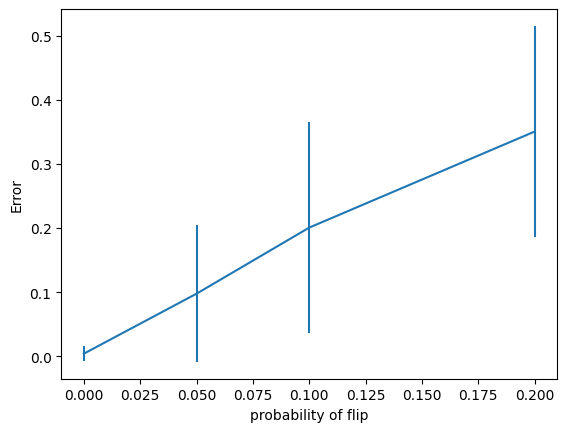

In [48]:
plt.figure()
plt.xlabel("probability of flip")
plt.ylabel("Error")
plt.errorbar(probabilities, mean_error, yerr=std_error)
plt.show()

**Comment the results as best as you can:**

**Answer:**
As expected, we can see with increasing the probability of error, error rate increases significantly and the algorithm cannot learn properly. In addition, increasing the error probability in labeling increases deviation around the mean error.

# Exercise 2: Real data

Let's play with the real data now, called the \emph{Iris flower data set}. This data set is widely used in machine learning and can be found in \url{https://archive.ics.uci.edu/ml/datasets/iris} or in the machine learning package \emph{Scikit-learn}.


Short description: This data set contains a set of 150 samples, which consists of 50 samples from each of three species of Iris:

*   setosa (label 0)
*   versicolor (label 1)

Each sample was measured in four features: sepal length, sepal width, petal length, and petal width.


## Part 1: Data Preparation and Visualization

Below we import the library sklearn and the dataset. Take your time to analyse the dataset structure and familiarize yourself with the problem. Can you make any prediction on the class separability?

**Answer:** This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

In [6]:
# Importing the Iris dataset

from sklearn import datasets
iris = datasets.load_iris()
# setosa: 0
# versicolor: 1
# virginica: 2

irisDf = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


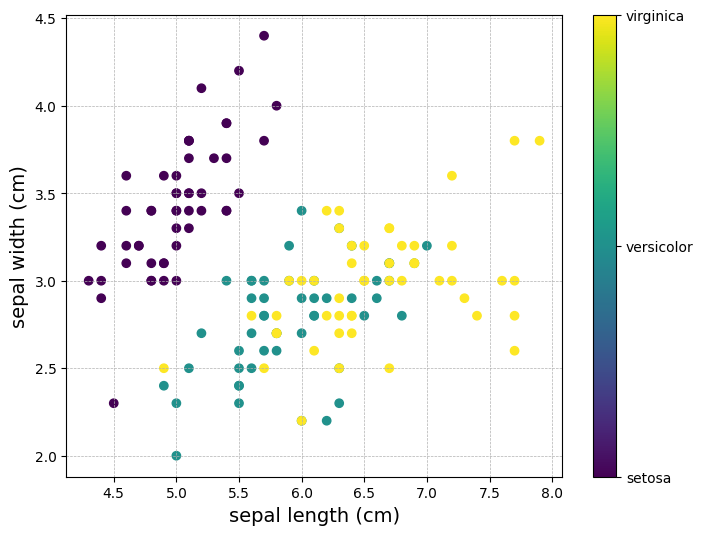

In [9]:
plot( irisDf[['sepal length (cm)','sepal width (cm)']].values, irisDf['target'].values,
    xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor', 'virginica'] )

## Part 2: Perceptron classifier

Now consider only the data set containing two classes: setosa and versicolor. Classify the data sat into two classes with the Perceptron.

In [11]:
# Selecting the first two classes: setosa, versicolor

irisDfBinary = irisDf.loc[ irisDf['target'] != 2 ]
irisDfBinary.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot only setosa and versicolor.

Complete the code below. You can use as inspiration the plot of the three classes.

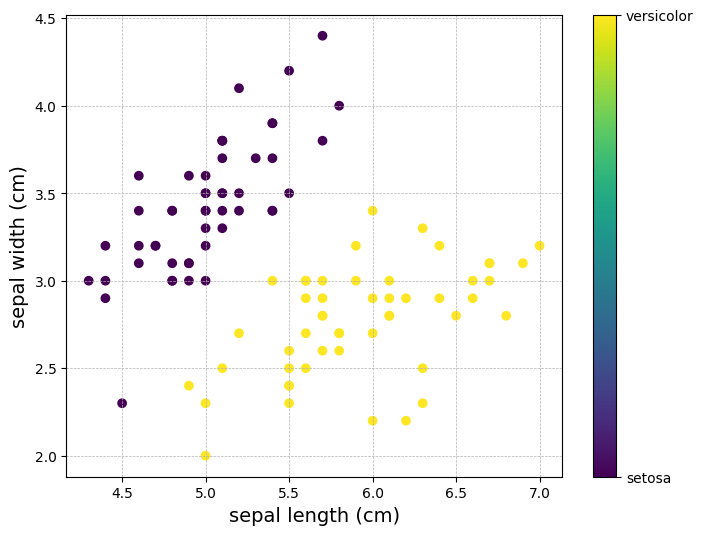

In [12]:
plot( irisDfBinary[['sepal length (cm)','sepal width (cm)']].values, irisDfBinary['target'].values,
    xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor'] )

## Build a dataset

Complete the code such that $X$ contains the training inputs and $Y$ the labels.

In [41]:
# Build dataset

X = irisDfBinary[['sepal length (cm)', 'sepal width (cm)']].to_numpy()
Y = irisDfBinary['target'].to_numpy().reshape(-1,1)

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (100, 2)
Y: (100, 1)


## Train/Test split
Split the data set into a balanced (with respect to the labels) training and test set, containing respectively $80\%$ and $20\%$ of the data set.

In [45]:
from sklearn.model_selection import train_test_split
def train_test_split_(X, Y, test_size_=0.2):
  X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = test_size_, random_state=42, shuffle=True)
  return X_train, Y_train, X_test, Y_test

## Running the perceptron algorithm

Run the perceptron on the train set and evaluate on the test set. Comment your results.

In [46]:
# Train the perceptron. Include bias if necessary
X_train, Y_train, X_test, Y_test = train_test_split_(X, Y)
lr = 1
include_bias = True
if include_bias:
  w = perceptron(np.concatenate((X_train, np.ones((X_train.shape[0],1)) ), axis=1 ), Y_train, lr)
else:
  w = perceptron(X_train, Y_train, lr)

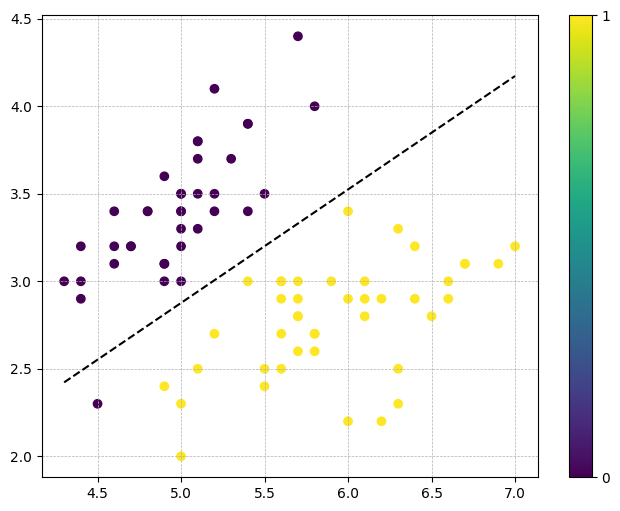

In [47]:
# Training data and separating hyperplane

plot(X_train,Y_train,w)

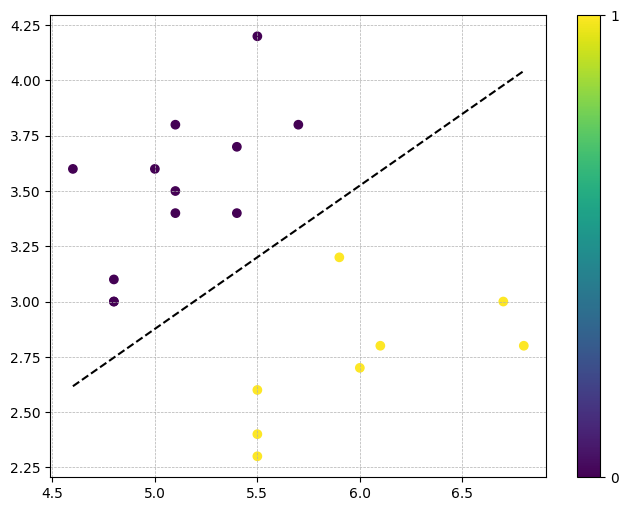

In [48]:
# Test data and separating hyperplane

plot(X_test,Y_test,w)

In [49]:
# Train and test errors

# predict
Y_train_pred = predict(X_train,w)

# evaluate
train_accuracy = accuracy(Y_train, Y_train_pred)
print("Train accuracy: {}".format(train_accuracy))

Train accuracy: 0.9875


In [50]:
# predict
Y_test_pred = predict(X_test,w)

# evaluate
test_accuracy = accuracy(Y_test, Y_test_pred)
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 1.0


**Comments:**
In this TP, we were introduced to the perceptron algorithm using a generated dataset. This method is suitable for linearly separable datasets. The algorithm performs well on the Iris dataset when considering it as a binary classification problem. We also learned that having a sufficient amount of data is crucial for improving the accuracy of machine learning models. A larger dataset helps the algorithm capture more patterns and generalize better to unseen data. Additionally, shuffling the data before training is important to prevent any order-based biases. Shuffling ensures that the model doesn't learn any unintended patterns based on the sequence of data, leading to better and more reliable performance.